# Library

In [1]:
install.packages("tidyverse")
install.packages("psych")
install.packages("tseries")
install.packages('plm')
install.packages('car')
install.packages('readxl')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Surpress Warning 
options(warn=-1)

In [3]:
library(tidyverse)
library(psych)
library(tseries)
library(plm)
library(car)
library(readxl)
library(lmtest)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘plm’


The following objects are masked from ‘package:dplyr’:

    between, lag, lead


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: zoo


Attachin

# Dataset

In [4]:
# Call Dataset
data = read_excel("/content/Dataset Panel.xlsx")
head(data)

No,Kab/Kota di Jawa Timur,Tahun,Pendapatan Domestik Regional Bruto atas Dasar Harga Berlaku (Miliar Rp),Tingkat Pengangguran (Persen),Jumlah Penduduk (Jiwa),Upah Minimum Kab/Kota (Rp),Jumlah Penduduk Miskin (ribu jiwa),Indeks Pembangunan Manusia
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bangkalan,2017,21654.6,4.48,970894,1530660,206.53,62.30
2,Banyuwangi,2017,72130.2,3.07,1604897,1730920,138.54,69.64
3,Batu,2017,14241.5,2.26,203997,2193150,8.77,74.26
4,Blitar,2017,31574.4,2.99,1153803,1520920,112.93,69.33
5,Blitar,2017,5782.4,3.76,139995,1509010,11.22,77.10
6,Bojonegoro,2017,64866.2,3.64,1243906,1582620,178.25,67.28


In [5]:
# Tidy Data
names(data)[2:9] <- c("KabKota","Tahun","PDRB","Tingkat_Pengangguran","Jumlah_Penduduk","UMK","Jumlah_Penduduk_Miskin","IPM")
data<-arrange(data,arrange(data,Tahun))

In [6]:
# Make KabKota As Factor
data$KabKota <- as.factor(data$KabKota)

In [7]:
# Check result
data

No,KabKota,Tahun,PDRB,Tingkat_Pengangguran,Jumlah_Penduduk,UMK,Jumlah_Penduduk_Miskin,IPM
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bangkalan,2017,21654.6,4.48,970894,1530660,206.53,62.30
2,Banyuwangi,2017,72130.2,3.07,1604897,1730920,138.54,69.64
3,Batu,2017,14241.5,2.26,203997,2193150,8.77,74.26
4,Blitar,2017,31574.4,2.99,1153803,1520920,112.93,69.33
5,Blitar,2017,5782.4,3.76,139995,1509010,11.22,77.10
6,Bojonegoro,2017,64866.2,3.64,1243906,1582620,178.25,67.28
7,Bondowoso,2017,17126.7,2.09,768912,1533910,111.66,64.75
8,Gresik,2017,118519.2,4.54,1285018,3293510,164.08,74.84
9,Jember,2017,67389.7,5.16,2430185,1763400,266.90,64.96


In [8]:
# Check Data Type
str(data)

tibble [190 × 9] (S3: tbl_df/tbl/data.frame)
 $ No                    : num [1:190] 1 2 3 4 5 6 7 8 9 10 ...
 $ KabKota               : Factor w/ 31 levels "Bangkalan","Banyuwangi",..: 1 2 3 4 4 5 6 7 8 9 ...
 $ Tahun                 : num [1:190] 2017 2017 2017 2017 2017 ...
 $ PDRB                  : num [1:190] 21655 72130 14242 31574 5782 ...
 $ Tingkat_Pengangguran  : num [1:190] 4.48 3.07 2.26 2.99 3.76 3.64 2.09 4.54 5.16 5.14 ...
 $ Jumlah_Penduduk       : num [1:190] 970894 1604897 203997 1153803 139995 ...
 $ UMK                   : num [1:190] 1530660 1730920 2193150 1520920 1509010 ...
 $ Jumlah_Penduduk_Miskin: num [1:190] 206.53 138.54 8.77 112.93 11.22 ...
 $ IPM                   : num [1:190] 62.3 69.6 74.3 69.3 77.1 ...


# Linearity Check 

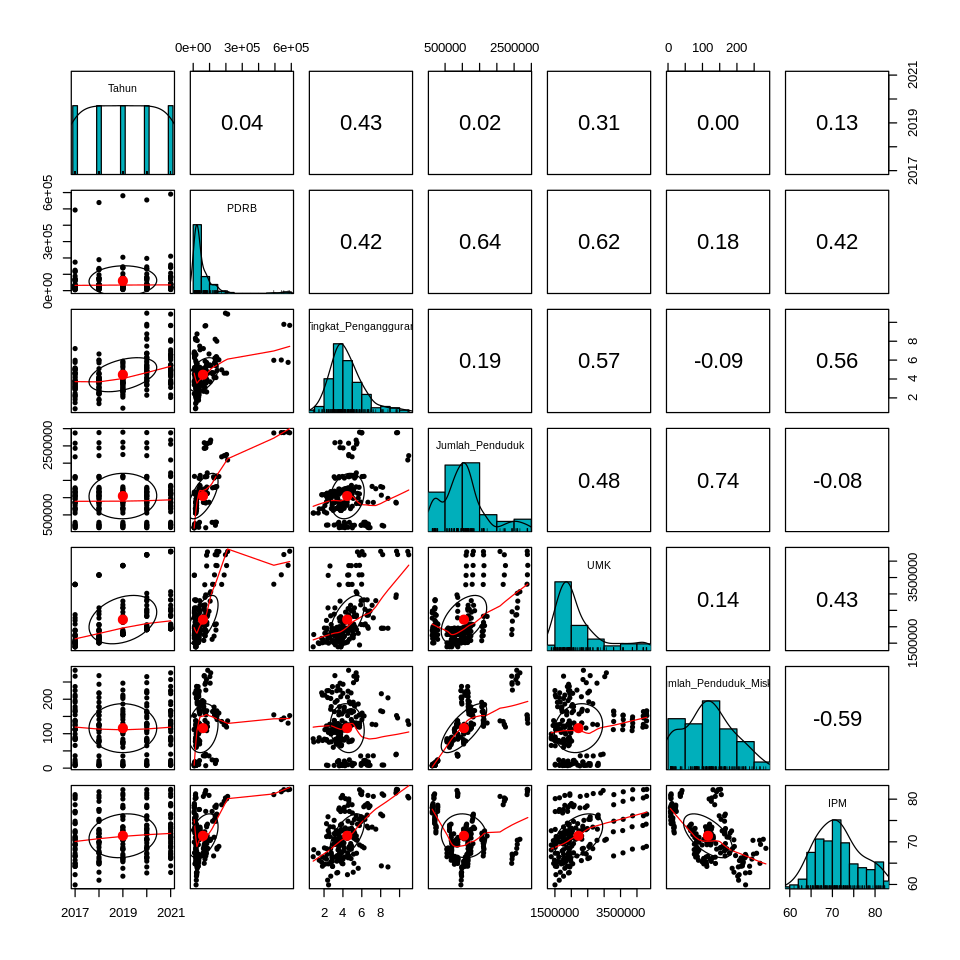

In [9]:
# Set Size Plot
options(repr.plot.width=8, repr.plot.height=8)
# Pair Plot
pairs.panels(data[,-1:-2], 
             method = "pearson",
             hist.col = "#00AFBB",
             density = TRUE,
             ellipses = TRUE)

# Normality Check

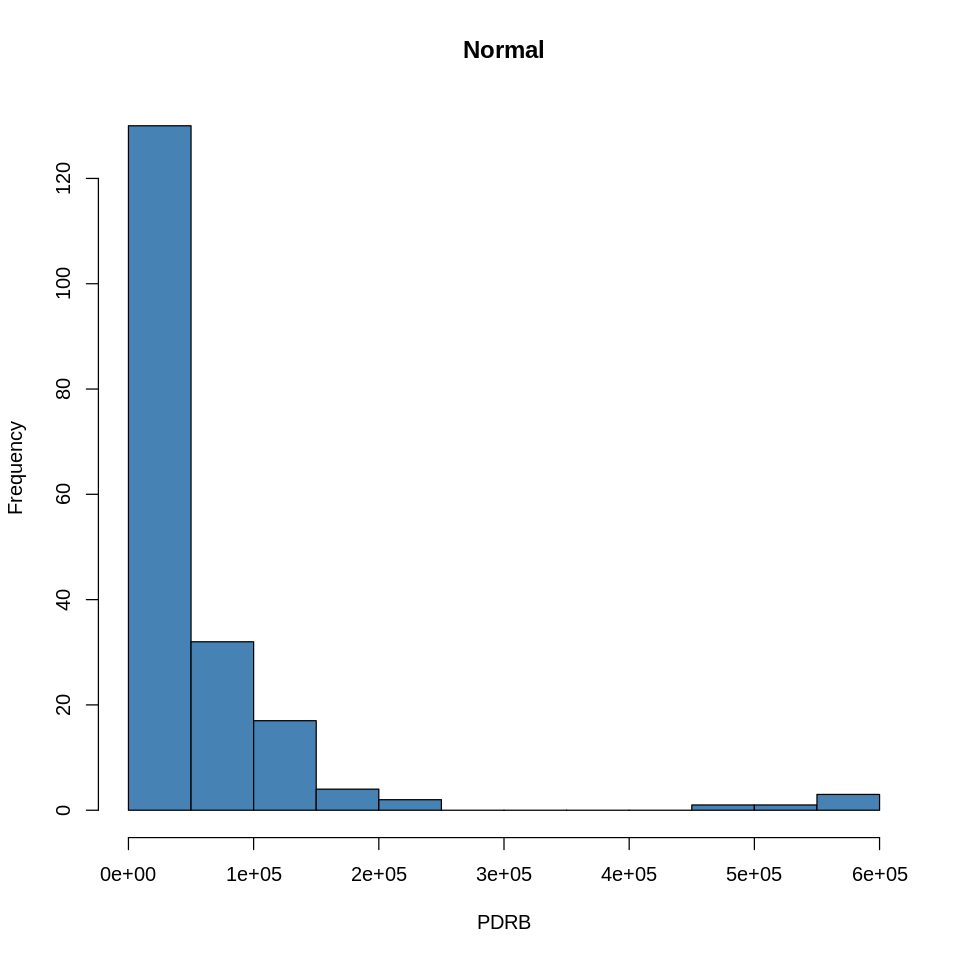

In [10]:
# Normality Check
hist(data$PDRB, col='steelblue', main='Normal', xlab = "PDRB")

In [11]:
# Kolmogorov Smirnov Test
ks.test(data$PDRB,'pnorm')


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  data$PDRB
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


In [12]:
# Shapiro Wilk Test
shapiro.test(data$PDRB)


	Shapiro-Wilk normality test

data:  data$PDRB
W = 0.50712, p-value < 2.2e-16


# Panel Model

In [13]:
# Common Effect
ce = plm(PDRB~Tingkat_Pengangguran+Jumlah_Penduduk+UMK+Jumlah_Penduduk_Miskin+IPM, data, model="pooling", index=c("KabKota","Tahun"))
# Fixed Effect
fe = plm(PDRB~Tingkat_Pengangguran+Jumlah_Penduduk+UMK+Jumlah_Penduduk_Miskin+IPM, data, model="within", index=c("KabKota","Tahun"))
# Random Effect
re = plm(PDRB~Tingkat_Pengangguran+Jumlah_Penduduk+UMK+Jumlah_Penduduk_Miskin+IPM, data, model="random", index=c("KabKota","Tahun"))

# Chow Test

In [14]:
#Chow Test
pooltest(ce,fe)


	F statistic

data:  PDRB ~ Tingkat_Pengangguran + Jumlah_Penduduk + UMK + Jumlah_Penduduk_Miskin +  ...
F = 33.933, df1 = 30, df2 = 154, p-value < 2.2e-16
alternative hypothesis: unstability


The Chow-Test or Chow test is performed to determine whether the model is better using the Common Effect or Fixed Effect estimation method. The initial hypothesis (H0) is that the Common Effect model is more suitable and the alternative hypothesis (H1) is that the Fixed Effect model is more suitable.

# Hausman Test

In [15]:
#Hausmann Test
phtest(fe,re)


	Hausman Test

data:  PDRB ~ Tingkat_Pengangguran + Jumlah_Penduduk + UMK + Jumlah_Penduduk_Miskin +  ...
chisq = 33.023, df = 5, p-value = 3.724e-06
alternative hypothesis: one model is inconsistent


This test aims to see whether there is a random effect in the panel data, namely by testing the hypothesis of the form $$𝐻_0:𝐸(𝐶_𝑖│𝑋)=𝐸(𝑢)=0$$, or there is a random effect in the data. If 𝐻0 is rejected, the effect model will still be used. In calculating this test statistic, it is necessary to assume that the number of cross-categories > the number of independent variables (including constants) in the model.

# Breusch-Pagan Test

In [16]:
# Two Ways Effect
plmtest(fe,effect="twoways",type="bp") #Test the cross section effect as well as time (Two Ways Effect)


	Lagrange Multiplier Test - two-ways effects (Breusch-Pagan)

data:  PDRB ~ Tingkat_Pengangguran + Jumlah_Penduduk + UMK + Jumlah_Penduduk_Miskin +  ...
chisq = 207.56, df = 2, p-value < 2.2e-16
alternative hypothesis: significant effects


In [17]:
# One Effect Cross Section
plmtest(fe,effect="individual",type="bp") #Cross Section Effect Test


	Lagrange Multiplier Test - (Breusch-Pagan)

data:  PDRB ~ Tingkat_Pengangguran + Jumlah_Penduduk + UMK + Jumlah_Penduduk_Miskin +  ...
chisq = 207.01, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects


In [18]:
# One Effect Time
plmtest(fe,effect="time",type="bp") #Time Effect Test


	Lagrange Multiplier Test - time effects (Breusch-Pagan)

data:  PDRB ~ Tingkat_Pengangguran + Jumlah_Penduduk + UMK + Jumlah_Penduduk_Miskin +  ...
chisq = 0.55443, df = 1, p-value = 0.4565
alternative hypothesis: significant effects


We get the model has cross section effect

# Wald Test

In [19]:
# Wald Test Model 1
m1 = plm(PDRB~Tingkat_Pengangguran+Jumlah_Penduduk+UMK+Jumlah_Penduduk_Miskin+IPM, data, model="within", effect="individual", index=c("KabKota","Tahun"))
summary(m1)

Oneway (individual) effect Within Model

Call:
plm(formula = PDRB ~ Tingkat_Pengangguran + Jumlah_Penduduk + 
    UMK + Jumlah_Penduduk_Miskin + IPM, data = data, effect = "individual", 
    model = "within", index = c("KabKota", "Tahun"))

Balanced Panel: n = 31, T = 5, N = 190

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-85934.03  -5073.05    227.53   4833.00  96699.76 

Coefficients:
                          Estimate  Std. Error t-value  Pr(>|t|)    
Tingkat_Pengangguran   -9.0988e+02  1.6777e+03 -0.5423   0.58837    
Jumlah_Penduduk        -1.2840e-02  1.9436e-02 -0.6607   0.50982    
UMK                     3.7471e-02  6.9853e-03  5.3643 2.928e-07 ***
Jumlah_Penduduk_Miskin -1.2541e+02  1.2881e+02 -0.9736   0.33177    
IPM                    -4.3877e+03  1.8793e+03 -2.3347   0.02085 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    9.4117e+10
Residual Sum of Squares: 7.0475e+10
R-Squared:      0.2512
Adj. R-Squared

In [20]:
# Wald Test Model 2
m2 = plm(PDRB~+Jumlah_Penduduk+UMK+Jumlah_Penduduk_Miskin+IPM, data, model="within", effect="individual", index=c("KabKota","Tahun"))
summary(m2)

Oneway (individual) effect Within Model

Call:
plm(formula = PDRB ~ +Jumlah_Penduduk + UMK + Jumlah_Penduduk_Miskin + 
    IPM, data = data, effect = "individual", model = "within", 
    index = c("KabKota", "Tahun"))

Balanced Panel: n = 31, T = 5, N = 190

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-85875.45  -4889.13    673.94   4399.52  95985.12 

Coefficients:
                          Estimate  Std. Error t-value  Pr(>|t|)    
Jumlah_Penduduk        -9.7679e-03  1.8550e-02 -0.5266   0.59924    
UMK                     3.5839e-02  6.2897e-03  5.6981 5.933e-08 ***
Jumlah_Penduduk_Miskin -1.4701e+02  1.2222e+02 -1.2028   0.23090    
IPM                    -4.6106e+03  1.8297e+03 -2.5199   0.01275 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    9.4117e+10
Residual Sum of Squares: 7.061e+10
R-Squared:      0.24977
Adj. R-Squared: 0.085203
F-statistic: 12.9008 on 4 and 155 DF, p-value: 4.3281e-09

In [21]:
# Wald Test Model 3
m3 = plm(PDRB~+UMK+Jumlah_Penduduk_Miskin+IPM, data, model="within", effect="individual", index=c("KabKota","Tahun"))
summary(m3)

Oneway (individual) effect Within Model

Call:
plm(formula = PDRB ~ +UMK + Jumlah_Penduduk_Miskin + IPM, data = data, 
    effect = "individual", model = "within", index = c("KabKota", 
        "Tahun"))

Balanced Panel: n = 31, T = 5, N = 190

Residuals:
    Min.  1st Qu.   Median  3rd Qu.     Max. 
-86931.4  -4697.0    544.8   4236.6  96302.5 

Coefficients:
                          Estimate  Std. Error t-value  Pr(>|t|)    
UMK                     3.3960e-02  5.1678e-03  6.5715 7.062e-10 ***
Jumlah_Penduduk_Miskin -1.9083e+02  8.9303e+01 -2.1369  0.034167 *  
IPM                    -4.1291e+03  1.5811e+03 -2.6116  0.009893 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    9.4117e+10
Residual Sum of Squares: 7.0736e+10
R-Squared:      0.24843
Adj. R-Squared: 0.089441
F-statistic: 17.1883 on 3 and 156 DF, p-value: 1.0765e-09

In [22]:
# Get Fixed Effect
fixed_effects <- fixef(m3, type = "level")
fixed_effects_df <- as.data.frame(fixed_effects)

In [23]:
fixed_effects_df

,fixed_effects
,<fixef>
Bangkalan,263595.4
Banyuwangi,325239.8
Batu,242408.0
Blitar,278284.1
Bojonegoro,325492.5
Bondowoso,251608.2
Gresik,345887.6
Jember,323929.4
Jombang,278466.7


# Diagnostic Checking

In [24]:
##Serial Correlation Test
pdwtest(m2)


	Durbin-Watson test for serial correlation in panel models

data:  PDRB ~ +Jumlah_Penduduk + UMK + Jumlah_Penduduk_Miskin + IPM
DW = 2.8354, p-value = 1
alternative hypothesis: serial correlation in idiosyncratic errors


In [25]:
##Multicollinearity test
pool=plm(PDRB~+UMK+Jumlah_Penduduk_Miskin+IPM,data,model="pooling",index=c("KabKota","Tahun"))
vif_df <- vif(pool)
vif_df <- as.data.frame(vif_df)
vif_df

,vif_df
,<dbl>
UMK,1.722202
Jumlah_Penduduk_Miskin,2.151536
IPM,2.587306


In [26]:
##Homoscedasticity Test
bptest(m3)


	studentized Breusch-Pagan test

data:  m3
BP = 49.047, df = 3, p-value = 1.275e-10


In [27]:
##Heteroscedasticity robust covariance estimator
coeftest(m3,vcovHC)


t test of coefficients:

                          Estimate  Std. Error t value  Pr(>|t|)    
UMK                     3.3960e-02  7.6492e-03  4.4397 1.696e-05 ***
Jumlah_Penduduk_Miskin -1.9083e+02  1.6097e+02 -1.1855   0.23762    
IPM                    -4.1291e+03  2.3193e+03 -1.7803   0.07697 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


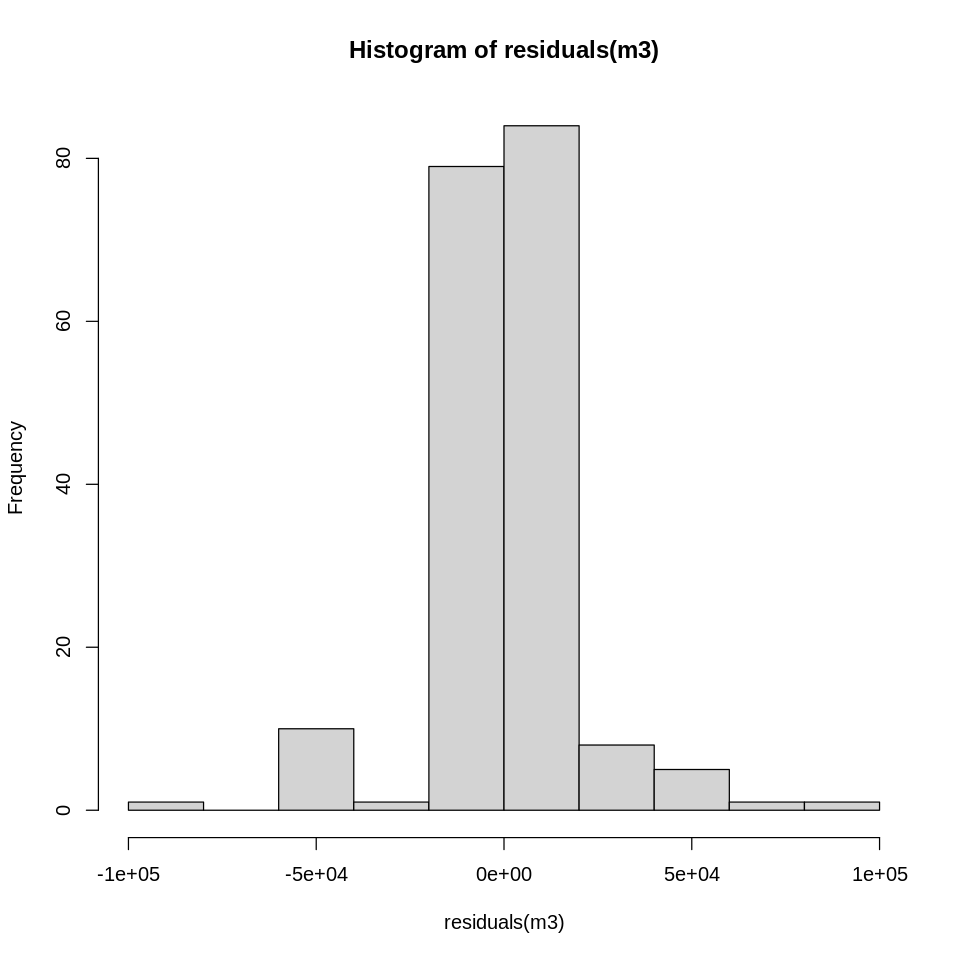

In [28]:
##Residual normality
hist(residuals(m3))

In [29]:
##Residual normality
ks.test(residuals(m3),'pnorm')


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  residuals(m3)
D = 0.52105, p-value < 2.2e-16
alternative hypothesis: two-sided
